# Tutorial for `Group.py`
This folder contains an extension of the [absalg](https://github.com/naftaliharris/Abstract-Algebra) library by [Naftali Harris](http://www.naftaliharris.com).

We start by loading the library

In [1]:
%pylab inline 
#we will do some drawing at the end...
from Group import *

Populating the interactive namespace from numpy and matplotlib


## Defining a group
Let us define a group from scratch. We need a set and a binary operation.

In [2]:
S=Set(range(5))
b_op=Function(S.cartesian(S),S,lambda x: (x[0]+x[1])%5)
G=Group(S,b_op)

We can, for instance, list the elements in `G`. Observe that this is just a representation of them.

In [3]:
list(G)

[0, 1, 2, 3, 4]

This does not mean that 1 is in `G`.

In [4]:
1 in G

False

However 1 is in the underlying set of `G`

In [5]:
1 in G.Set

True

In order to see 1 in `G`, we need to create an instance of it as element in `G`. And then, we can operate with it.

In [6]:
one=G(1)
one*one

2

As in this case, `G` is abelian, we can even perform the last operation by using `+`.

In [7]:
one+one

2

Also, in this case powers become multiples.

In [8]:
one**3==3*one

True

The Cayley table of `G` can be calculated as follows (multiplicative table).

In [9]:
G.table()

*,0,1,2,3,4
0,0,1,2,3,4
1,1,2,3,4,0
2,2,3,4,0,1
3,3,4,0,1,2
4,4,0,1,2,3


In [10]:
Set([i*one for i in range(10)])

frozenset({0, 1, 2, 3, 4})

We can indeed do this last operation by considering the group spanned by `one`; which in this case is `G` itself.

In [11]:
H=G.generate([one])
H==G

True

In [12]:
H==G.generate([1])

True

This means that this group is *cyclic*.

In [13]:
G.is_cyclic()

True

We can also define a subgroup by its elements. The procedure will raise an error if the set is not a subgroup of the given group

In [14]:
G1=CyclicGroup(6)
H=G1.subgroup_by_elms([0,3])

In [15]:
3 in H.Set

True

In [16]:
H(3) in G1

True

The inverse of an element can be compute in several ways. 

In [17]:
[G.inverse(one), one**-1]

[4, 4]

We can compute the lattice of subgroups of `G`. The output is a dictionary: `n:set of subgroups of order n`.

In [18]:
subgs=G.subgroups()

In [19]:
subgs

{1: {Group( [0] )}, 5: {Group( [0, 1, 2, 3, 4] )}}

Alternatively, we can compute a list with all subgroups with given order.

In [20]:
G.subgroups(5)

Group( [0, 1, 2, 3, 4] )

In particular this implies that `G` is a simple group.

In [21]:
G.is_simple()

True

However, `G1` is not simple, since it has nontrivial subgroups

In [22]:
G1.is_simple()

False

We can print the elements in the subgroups of `G`

In [23]:
[list(H) for j in subgs.keys() for H in subgs[j]]

[[0], [0, 1, 2, 3, 4]]

Since `G` is abelian, all its subgroups are normal.

In [24]:
all(H.is_normal_subgroup(G) for H in subgs)

<generator object <genexpr> at 0x1066f8f68>

Indeed groups as `G` are quite common, this is why we dedided to write an specific function to define them: `CyclicGroup`. We will talk later more about it. 

The function `CyclicGroup(n)` returns (as defaul) the group $(\mathbb{Z}_n,+)$.

In [25]:
G.is_isomorphic(CyclicGroup(5))

True

## Cartesian product and quotients
A way to obtain groups from others is by computing cartesian products, or quotients by normal subgroups.

Let us, for instance, compute `G^2`

In [26]:
G2=G.cartesian(G)

The elements of `G2` are tuples. We can as above, instanciate one of its elements.

In [27]:
one2=G2((1,1))

We can define the cyclic group generated by `one2`, and check that indeed is a subgroup of `G2`.

In [28]:
H=G2.generate([one2])
H<=G2

True

Contrary to what happened above, in this case `H` is not `G2` itself; this is due to the fact that `G2` is no longer cyclic. Let us compute a system of generators of `G2`.

In [29]:
H==G2

False

In [30]:
G2.is_cyclic()

False

In [31]:
G2.generators()

[(0, 1), (1, 0)]

We already know that every subgroup of an abelian group is normal, and so we can compute the quotient of `G2` by `H`.

In [32]:
G2/H

Group with 5 elements

Its elements are congruency classes, and this is why when listing them, we get a lists of sets.

In [33]:
Q=G2/H
list(Q)

[Set({(2, 2), (4, 4), (1, 1), (0, 0), (3, 3)}),
 Set({(4, 2), (0, 3), (3, 1), (2, 0), (1, 4)}),
 Set({(0, 1), (3, 4), (2, 3), (1, 2), (4, 0)}),
 Set({(1, 0), (3, 2), (4, 3), (2, 1), (0, 4)}),
 Set({(3, 0), (0, 2), (1, 3), (4, 1), (2, 4)})]

In [34]:
Q.is_abelian()

True

In [35]:
Q.is_cyclic()

True

In [36]:
sbgrps=G2.subgroups()
#[[list(J) for J in sbgrps[j]] for j in sbgrps.keys()]
for j in sbgrps.keys():
    print(str(j)+"->"+str([list(J) for J in sbgrps[j]]))

25->[[(0, 0), (1, 3), (3, 0), (2, 1), (0, 3), (2, 4), (4, 0), (1, 2), (3, 3), (4, 4), (0, 4), (2, 2), (4, 1), (1, 1), (3, 2), (1, 4), (2, 3), (4, 2), (1, 0), (0, 1), (3, 1), (2, 0), (4, 3), (3, 4), (0, 2)]]
5->[[(0, 0), (3, 0), (2, 0), (1, 0), (4, 0)], [(0, 0), (0, 1), (0, 3), (0, 2), (0, 4)], [(0, 0), (1, 2), (3, 1), (2, 4), (4, 3)], [(0, 0), (3, 2), (4, 1), (1, 4), (2, 3)], [(0, 0), (2, 1), (4, 2), (1, 3), (3, 4)], [(0, 0), (1, 1), (3, 3), (4, 4), (2, 2)]]
1->[[(0, 0)]]


## Group homomorphisms

In order to define a group homomorphism, we have to provide the domain, codomain and a function that fulfills that is a group morphism

In [37]:
G=CyclicGroup(3)
H=G.cartesian(G)
f=GroupHomomorphism(H,G, lambda x:G(x.elem[1]))

We can compute the kernel, or check wether or not it is injective, surjective or and isomorphism

In [38]:
f.kernel()

Group( [(2, 0), (1, 0), (0, 0)] )

In [39]:
f.is_bijective()

False

In [40]:
f.is_surjective()

True

In [41]:
G=CyclicGroup(6)
f=GroupHomomorphism(G,G, lambda x:2*x)

In [42]:
f.is_injective()

False

In [43]:
list(f.kernel())

[0, 3]

In [44]:
f.function(G(1))

2

Also we can compute this as follows.

In [45]:
f(G(2))

4

For compute a list of all the homomorphisms between two groups:

In [46]:
G=CyclicGroup(18)
H=CyclicGroup(30)
Hom=G.AllHomomorphisms(H)
Hom

[Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism]

Also we can compute the group of automorphisms of a group

In [47]:
G=CyclicGroup(5)
Aut=G.AutomorphismGroup()
Aut

Group( [Group endomorphism, Group endomorphism, Group endomorphism, Group endomorphism] )

In [48]:
Aut.table('letters')

*,e,a,b,c
e,e,a,b,c
a,a,e,c,b
b,b,c,a,e
c,c,b,e,a


In [49]:
Aut.is_isomorphic(GroupOfUnitsModInt(5))

True

## Permutations

Permutations are a fundamental tool for the study of groups. Indeed permutations (bijective maps) of the set $\{1,\ldots,n\}$ under composition are a group that is not abelian for $n\ge 3$.

We have included a bunch of ways to define a permuation with the class `permutation`.

- `permutation(list of integers)` creates a permutation in which the $i$ goes to the $i$th elmeent in the given list of integers.

- `permutation(sequence of integers)` does the same as above, by considering the sequence as a list.

- `permutation(sequence of tuples)` creates a permutation that is the product of the given tuples, by considering the tuples as cycles.

- `permutation(list of tuples)` does the same as in the preceding case.


In [50]:
permutation(2,3,1,4)==permutation([2,3,1,4])

True

In [51]:
permutation((1,2),(3,4))==permutation([(1,2),(3,4)])

True

Composition of permutations is performed by using the `*` operator; powers with `**`.

In [52]:
p=permutation((1,2),(3,4))
p*p

( )

You may gues from the above output that we are displaying the identity map just by `( )`. Permutations are displayed as a product of disjoint cycles, and printed both in matrix representation and as a product of disjoint cycles.

In [53]:
p

 (1, 2)(3, 4)

In [54]:
print(p)

[2, 1, 4, 3] =  (1, 2)(3, 4)


In [55]:
p**-1==p

True

The order of a permutation is computed as follows.

In [56]:
p.order()

2

Also we can compute its sign, inversions and decomposition into disjoint cycles.

In [57]:
p.sign()

1

In [58]:
p.inversions()

[(1, 2), (3, 4)]

In [59]:
p.disjoint_cycles()

[(1, 2), (3, 4)]

## Groups of permutations

As we mentioned above, permutations of $\{1,\ldots, n\}$ with composition as binary operation are a group, which is known as the symmetric group and it is denoted by $S_n$. We have a function to created groups of permutations.

In [60]:
S3=SymmetricGroup(3)
list(S3)

[( ),  (1, 3, 2),  (2, 3),  (1, 3),  (1, 2, 3),  (1, 2)]

In [61]:
p=S3(permutation(3,2,1))
q=S3(permutation(2,1,3))

In [62]:
H=S3.generate([p,q])

In [63]:
H.group_elems

frozenset({ (1, 3, 2),  (2, 3),  (1, 3),  (1, 2, 3), ( ),  (1, 2)})

An important subgroup of the symmetric group $S_n$ is the group of all even (sign=1) permutations, which is known as the alternating group and denoted by $A_n$. It is well known that $A_n$ is a normal subgroup of $S_n$.

In [64]:
A3=AlternatingGroup(3)
list(S3/A3)

[Set({ (1, 3, 2),  (1, 2, 3), ( )}), Set({ (1, 2),  (2, 3),  (1, 3)})]

And in this way we are listing odd and even permutations in separate sets.

The symmetric group $S_n$ has always a "copy" of `CyclicGroup(n)`, which is the subgroup of $S_n$ spanned by the cycle $(1\ldots n)$. We can construct it as follows. 

In [65]:
C3=CyclicGroup(3,"permutations")
list(C3)

[( ),  (1, 3, 2),  (1, 2, 3)]

In [66]:
Z3=CyclicGroup(3)
list(C3)

[( ),  (1, 3, 2),  (1, 2, 3)]

In [67]:
C3.is_isomorphic(Z3)

True

Another important subgroup of the $S_n$ is the dihedral group of movements that leave invariant an $n$-gon centered in the origin. This group can be represented either by permutations or by symmetries and rotations.

In [68]:
D4=DihedralGroup(4)
D4.table()

*,'R0','S3','R3','S2','R2','R1','S1','S0'
'R0','R0','S3','R3','S2','R2','R1','S1','S0'
'S3','S3','R0','S0','R1','S1','S2','R2','R3'
'R3','R3','S2','R2','S1','R1','R0','S0','S3'
'S2','S2','R3','S3','R0','S0','S1','R1','R2'
'R2','R2','S1','R1','S0','R0','R3','S3','S2'
'R1','R1','S0','R0','S3','R3','R2','S2','S1'
'S1','S1','R2','S2','R3','S3','S0','R0','R1'
'S0','S0','R1','S1','R2','S2','S3','R3','R0'


## Product and intersection of subgroups
Product and intersection of subgroups of a group $G$ are again subgroups of $G$

In [69]:
Dp4=DihedralGroup(4,"permutations")
list(Dp4)

[( ),
  (1, 4, 3, 2),
  (1, 3)(2, 4),
  (2, 4),
  (1, 2, 3, 4),
  (1, 4)(2, 3),
  (1, 3),
  (1, 2)(3, 4)]

In [70]:
A4=AlternatingGroup(4)
A4*Dp4

Group( [ (1, 3, 4, 2),  (1, 3, 2, 4),  (3, 4),  (1, 2, 4, 3)] )

In [71]:
list(A4.intersection(Dp4))

[( ),  (1, 3)(2, 4),  (1, 4)(2, 3),  (1, 2)(3, 4)]

We can for instance, illustrate the third isometry theorem: $KN/N\cong K/(K\cap N)$.

In [72]:
Q1=(A4*Dp4)/A4
Q2=Dp4/(A4.intersection(Dp4))
Q1.is_isomorphic(Q2)

True

## Lateral classes, conjugacy clases and center

Lateral classes are easy to construct; they are considered as sets.

In [73]:
S4=SymmetricGroup(4)
p=S4(permutation([2,3,4,1]))
p*A4

frozenset({ (1, 4, 3, 2),
            (1, 2),
            (2, 3),
            (1, 3, 4, 2),
            (2, 4),
            (1, 3, 2, 4),
            (3, 4),
            (1, 2, 3, 4),
            (1, 4),
            (1, 4, 2, 3),
            (1, 3),
            (1, 2, 4, 3)})

In [74]:
A4*p

frozenset({ (1, 4, 3, 2),
            (1, 2),
            (2, 3),
            (1, 3, 4, 2),
            (2, 4),
            (1, 3, 2, 4),
            (3, 4),
            (1, 2, 3, 4),
            (1, 4),
            (1, 4, 2, 3),
            (1, 3),
            (1, 2, 4, 3)})

We can also calculate all cosets.

In [75]:
S4.cosets(A4)

[{ (1, 2)(3, 4),
   (1, 2, 3),
   (1, 4, 3),
   (1, 3)(2, 4),
  ( ),
   (2, 3, 4),
   (2, 4, 3),
   (1, 3, 4),
   (1, 2, 4),
   (1, 4)(2, 3),
   (1, 3, 2),
   (1, 4, 2)},
 { (1, 2),
   (1, 4, 3, 2),
   (1, 3, 4, 2),
   (2, 3),
   (2, 4),
   (3, 4),
   (1, 3, 2, 4),
   (1, 2, 4, 3),
   (1, 2, 3, 4),
   (1, 4),
   (1, 3),
   (1, 4, 2, 3)}]

In [76]:
S4.cosets(A4,"right")

[{ (1, 2)(3, 4),
   (1, 2, 3),
   (1, 4, 3),
   (1, 3)(2, 4),
  ( ),
   (2, 3, 4),
   (2, 4, 3),
   (1, 3, 4),
   (1, 2, 4),
   (1, 4)(2, 3),
   (1, 3, 2),
   (1, 4, 2)},
 { (1, 4, 3, 2),
   (1, 2),
   (2, 3),
   (1, 3, 4, 2),
   (2, 4),
   (3, 4),
   (1, 3, 2, 4),
   (1, 2, 3, 4),
   (1, 4),
   (1, 4, 2, 3),
   (1, 3),
   (1, 2, 4, 3)}]

In [77]:
len(_)

2

For a group $G$, the conjugacy class of an element $x$ ($\{gxg^-1\mid g\in G\}$) and of a subgroup $H$ ($\{gHg^{-1}\mid g\in G\}$) can be calculated as follows.

In [78]:
p.conjugacy_class()

frozenset({ (1, 4, 3, 2),
            (1, 3, 4, 2),
            (1, 3, 2, 4),
            (1, 2, 4, 3),
            (1, 2, 3, 4),
            (1, 4, 2, 3)})

In [79]:
A4.conjugacy_class_subgroup(S4)

frozenset({Group( [ (1, 4, 3, 2),  (1, 2)] )})

And also the set of all conjugacy classes.

In [80]:
S4.conjugacy_classes()

{frozenset({ (1, 4, 3, 2),
             (1, 3, 4, 2),
             (1, 3, 2, 4),
             (1, 2, 3, 4),
             (1, 4, 2, 3),
             (1, 2, 4, 3)}),
 frozenset({( )}),
 frozenset({ (1, 4, 3),
             (1, 2, 3),
             (2, 3, 4),
             (2, 4, 3),
             (1, 3, 4),
             (1, 2, 4),
             (1, 3, 2),
             (1, 4, 2)}),
 frozenset({ (1, 4)(2, 3),  (1, 3)(2, 4),  (1, 2)(3, 4)}),
 frozenset({ (1, 2),  (2, 3),  (2, 4),  (3, 4),  (1, 4),  (1, 3)})}

Also for a subgroup

In [81]:
G=SymmetricGroup(4)
c=G(permutation([1,3,4,2]))
d=G(permutation([1,2,4,3]))
H=G.generate([c,d])
G.conjugacy_class_subgroup(H)

frozenset({Group( [ (1, 2, 4),  (1, 2)] ),
           Group( [ (2, 4, 3),  (2, 4)] ),
           Group( [ (1, 3, 4),  (1, 3)] ),
           Group( [ (1, 2, 3),  (2, 3)] )})

In [82]:
G=DihedralGroup(4)
G.conjugacy_classes_subgroups()

{frozenset({Group( ['R0', 'S0'] ), Group( ['R0', 'S2'] )}),
 frozenset({Group( ['S0', 'R0', 'R2'] )}),
 frozenset({Group( ['R0', 'R1'] )}),
 frozenset({Group( ['R0'] )}),
 frozenset({Group( ['R3', 'S2'] )}),
 frozenset({Group( ['R0', 'S1'] ), Group( ['R0', 'S3'] )}),
 frozenset({Group( ['R0', 'R2'] )}),
 frozenset({Group( ['S3', 'R0', 'R2'] )})}

The normalizar of a subgroup $H$ ($\{g\in G\mid gH=Hg\}$) can be computed with `normalizer`.

In [83]:
A4.normalizer(S4)

Group with 12 elements

And the center (the set of elements that commute with all the elements in $G$) with `center`.

In [84]:
S4.center()

Group( [( )] )

The normal closure of a subgroup H in a group G can be computed:

In [85]:
G=SymmetricGroup(3)
a=G(permutation([2,1,3]))
H=G.generate([a])
G.normal_closure(H)

Group( [ (1, 2),  (2, 3)] )

In [86]:
G=SymmetricGroup(4)
a=G(permutation([2,1,3,4]))
b=G(permutation([2,3,1,4]))
H=G.generate([a])
K=G.generate([b])
G.commutator(H,K)

Group( [ (1, 3, 2),  (2, 4, 3)] )

## Group actions
Recall that a group action is a map $*:G\times X \to X$ with $G$ a group and $X$ a set such that 

1. $a*(b*x)=(a b)*x$ for all $a,b\in G$ and all $x\in X$
2. $e*x=x$ for all $x\in X$

In [87]:
G=SymmetricGroup(3)
f=GroupAction(G,Set({1,2,3}),lambda x,y:x.elem(y))
p=G(permutation(2,3,1))
f.function(p,3)

1

In [88]:
f.orbit(2)

frozenset({1, 2, 3})

In [89]:
f.stabilizer(2)

Group( [( ),  (1, 3)] )

In [90]:
list(f.stabilizer(2))

[( ),  (1, 3)]

The group is transitive, as it has a single orbit.

In [91]:
f.orbits()

[frozenset({1, 2, 3})]

In [92]:
f.is_transitive()

True

Now let us change the action to the conjugation.

In [93]:
X=G.group_elems
f=GroupAction(G,X,lambda g,x:g*x*g**-1)

In this setting, the orbit coincides with the conjugacy class of the element in the group.

In [94]:
f.orbit(p)

frozenset({ (1, 3, 2),  (1, 2, 3)})

In [95]:
p.conjugacy_class()

frozenset({ (1, 3, 2),  (1, 2, 3)})

And the stabilizer is just the centralizer.

In [96]:
p.centralizer()==f.stabilizer(p)

True

## Quaternions and the Klein group

In [97]:
Q2=QuaternionGroup()
list(Q2)

['1', '-i', 'i', 'k', '-1', 'j', '-j', '-k']

In [98]:
Q2.center()

Group( ['1', '-1'] )

Klein group can be represented as $\mathbb{Z}_2\times \mathbb{Z}_2$ or as a subgroup of $A_4$ (and thus of $S_4$)

In [99]:
K=KleinGroup()

In [100]:
list(K)

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [101]:
list(KleinGroup("permutations"))

[( ),  (1, 4)(2, 3),  (1, 3)(2, 4),  (1, 2)(3, 4)]

It is well known that the quaternions modulo its center yield the Klein group.

In [102]:
Q=Q2/Q2.center()

In [103]:
Q.is_cyclic()

False

In [104]:
Q.is_isomorphic(K)

True

## Groups of units
The group of units (wrt multiplication) of $\mathbb{Z}_n$ is constructed as follows.

In [105]:
G=GroupOfUnitsModInt(6)
G.table()

*,1,5
1,1,5
5,5,1


## Drawing the lattice of subgroups
We first load the modules and functions needed to draw.

Or we can draw the Cayley graph of $S_3$ with respect to $(1,2,3)$ and $(2,3)$

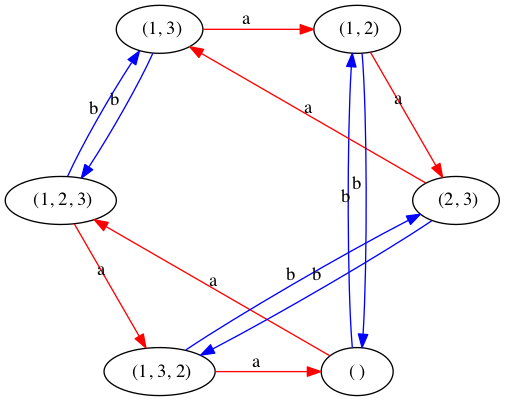

In [106]:
SymmetricGroup(3).CayleyGraph()

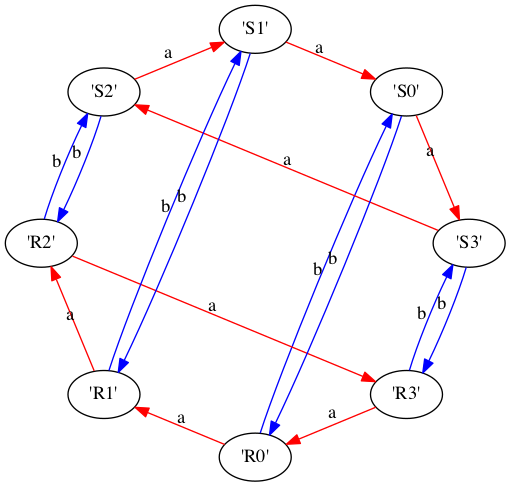

In [107]:
DihedralGroup(4).CayleyGraph()

In [108]:
from sympy.ntheory import *

In [109]:
primefactors(6)

[2, 3]

In [110]:
divisors(6)

[1, 2, 3, 6]

A,{0}
B,"{0, 2}"
C,"{0, 1, 2, 3}"


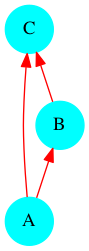

In [111]:
CyclicGroup(4).group_lattice()

A,"{(0, 0)}"
B,"{(2, 0), (0, 0)}"
C,"{(0, 1), (0, 0), (0, 2)}"
D,"{(3, 0), (2, 0), (1, 0), (0, 0)}"
E,"{(0, 1), (2, 0), (0, 0), (2, 2), (0, 2), (2, 1)}"
F,"{(0, 1), (1, 2), (3, 2), (0, 0), (3, 0), (0, 2), (3, 1), (2, 1), (2, 0), (2, 2), (1, 0), (1, 1)}"


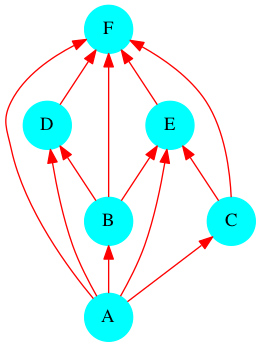

In [112]:
CyclicGroup(4).cartesian(CyclicGroup(3)).group_lattice()

A,{( )}
B,"{ (1, 2), ( )}"
C,"{( ), (1, 3)}"
D,"{ (2, 3), ( )}"
E,"{ (1, 3, 2), (1, 2, 3), ( )}"
F,"{ (2, 3), (1, 3), (1, 2), (1, 3, 2), (1, 2, 3), ( )}"


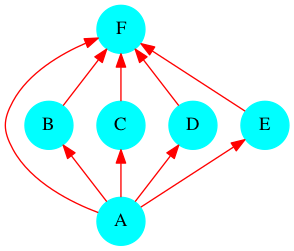

In [113]:
SymmetricGroup(3).group_lattice()

A,"{'S3', 'R3', 'S2', 'R2', 'R1', 'S1', 'S0', 'R0'}"
B,{'R0'}
C,"{'S0', 'R0'}"
D,"{'S2', 'R0'}"
E,"{'R2', 'R0'}"
F,"{'R0', 'S1'}"
G,"{'S3', 'R0'}"
H,"{'S3', 'R2', 'R0', 'S1'}"
I,"{'R1', 'R2', 'R0', 'R3'}"
J,"{'S2', 'S0', 'R2', 'R0'}"


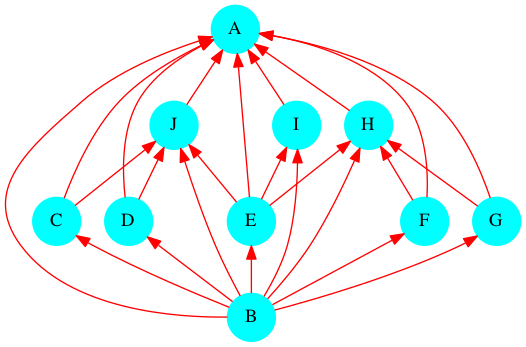

In [114]:
DihedralGroup(4).group_lattice()